In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import Matrix
from scipy.linalg import eigvals
from collections import Counter

In [3]:
A = Matrix([[4, -1, -1, 2, 0],
              [0, 4, 2, -2, 3],
              [-1, -3, 6, 0, 4],
              [-1, -2, 1, 5, 3],
              [0, 0, 1, -1, 6]])

In [5]:
P,J=A.jordan_form()

In [7]:
J,P

(Matrix([
 [5, 1, 0, 0, 0],
 [0, 5, 1, 0, 0],
 [0, 0, 5, 1, 0],
 [0, 0, 0, 5, 0],
 [0, 0, 0, 0, 5]]),
 Matrix([
 [-1,  1, -1, 0,  0],
 [ 0, -1, -1, 1,  1],
 [-1,  1, -3, 0, -1],
 [-1,  0, -2, 0,  0],
 [ 0, -1,  0, 0,  1]]))

In [9]:
P

Matrix([
[-1,  1, -1, 0,  0],
[ 0, -1, -1, 1,  1],
[-1,  1, -3, 0, -1],
[-1,  0, -2, 0,  0],
[ 0, -1,  0, 0,  1]])

In [11]:
# 定义矩阵 A
A = np.array([[4, -1, -1, 2, 0],
              [0, 4, 2, -2, 3],
              [-1, -3, 6, 0, 4],
              [-1, -2, 1, 5, 3],
              [0, 0, 1, -1, 6]], dtype=float)

# 计算矩阵的实数特征值
eigenvalues = eigvals(A)
# 只考虑实数特征值
real_eigenvalues = eigenvalues[np.isreal(eigenvalues)].real  # 提取实数特征值
# 获取唯一特征值
unique_eigenvalues = np.unique(np.round(real_eigenvalues, decimals=1))  # 对特征值进行四舍五入，以避免精度问题
print("唯一特征值:", unique_eigenvalues)

# 计算特征值对应的几何重数
def geometric_multiplicity(A, eigenvalue):
    """
    计算特征值对应的几何重数
    """
    n = A.shape[0]
    I = np.eye(n)
    matrix = A - eigenvalue * I
    # 计算矩阵 (A - λI) 的秩
    rank = np.linalg.matrix_rank(matrix)
    # 几何重数 = 维度 - 秩
    geom_mult = n - rank
    return geom_mult

# 创建字典保存特征值和几何重数
eigenvalue_geometric_multiplicities = {}

# 遍历特征值并计算几何重数
for eigenvalue in unique_eigenvalues:
    eigenvector_counts = geometric_multiplicity(A, eigenvalue)
    eigenvalue_geometric_multiplicities[eigenvalue] = eigenvector_counts

# 输出字典
print("特征值:几何重数")
print(eigenvalue_geometric_multiplicities)

唯一特征值: [5.]
特征值:几何重数
{5.0: 2}


In [13]:
def jordan_block(lambda_val, size):
    """
    创建一个给定特征值 lambda_val 和大小 size 的若尔当块
    """
    block = np.eye(size) * lambda_val  # 对角线是 lambda_val
    for i in range(size - 1):
        block[i, i + 1] = 1  # 上三角部分为 1
    return block
jordan_block(5,1)

array([[5.]])

In [15]:
# 对特征值进行四舍五入（保留1位小数），并确保键是实数
eigenvalues_rounded = np.round(np.real(eigenvalues), 1)
# 使用 Counter 统计每个特征值的出现次数，得到代数重数
element_counts = Counter(eigenvalues_rounded)
# 将计数结果存储为字典，键为特征值（保留1位小数），值为出现次数（即代数重数）
algebraic_multiplicities = {key: count for key, count in element_counts.items()}
# 输出代数重数
print("代数重数:", algebraic_multiplicities)
# 构建若尔当块
def jordan_block(lambda_val, size):
    """
    创建一个给定特征值 lambda_val 和大小 size 的若尔当块
    """
    block = np.eye(size) * lambda_val  # 对角线是 lambda_val
    for i in range(size - 1):
        block[i, i + 1] = 1  # 上三角部分为 1
    return block

# 构造若尔当矩阵
def construct_jordan_matrix():
    """
    根据特征值和几何重数构造若尔当矩阵
    """
    # 创建若尔当矩阵
    jordan_blocks = []
    
    # 假设特征值 5 和几何重数为 2
    # 为特征值 5 创建 4x4 和 1x1 的若尔当块
    A = jordan_block(5, 4)
    B = jordan_block(5, 1)  
    
    # 使用 np.block 拼接矩阵
    jordan_matrix = np.block([
        [A, np.zeros((4, 1))],    
        [np.zeros((1, 4)), B]])
    
    return jordan_matrix

# 构造若尔当矩阵
J = construct_jordan_matrix()
print("若尔当矩阵 J:")
print(J)



代数重数: {5.0: 5}
若尔当矩阵 J:
[[5. 1. 0. 0. 0.]
 [0. 5. 1. 0. 0.]
 [0. 0. 5. 1. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 5.]]


In [17]:
import sympy as sp

# 定义矩阵 A
A = sp.Matrix([[4, -1, -1, 2, 0],
              [0, 4, 2, -2, 3],
              [-1, -3, 6, 0, 4],
              [-1, -2, 1, 5, 3],
              [0, 0, 1, -1, 6]])

# 定义特征值
lambda_val = 5

# 计算 (A - λI)^k 的广义特征向量
def find_generalized_eigenvectors(A, lambda_val, k):
    I = sp.eye(A.shape[0])  # 单位矩阵
    A_lambda_I = A - lambda_val * I  # (A - λI)
    
    # 计算 (A - λI)^k
    A_lambda_I_k = A_lambda_I**k  # 计算 (A - λI)^k
    
    # 求解 (A - λI)^k v = 0 方程，得到广义特征向量
    generalized_eigenvectors = A_lambda_I_k.nullspace()
    
    return generalized_eigenvectors

# 存储所有的广义特征向量
all_generalized_eigenvectors = []

# 遍历 k 从 1 到 3，计算每个 k 对应的广义特征向量
for k in range(1, 5):  # k 从 1 到 3
    print(f"计算 (A - λI)^{k} 的广义特征向量:")
    
    # 计算广义特征向量
    generalized_eigenvectors = find_generalized_eigenvectors(A, lambda_val, k)
    
    # 打印广义特征向量，分数形式显示
    for vec in generalized_eigenvectors:
        print([sp.simplify(v) for v in vec])
    
    # 将结果添加到 all_generalized_eigenvectors 列表
    all_generalized_eigenvectors.extend(generalized_eigenvectors)

    print()  # 换行以便区分不同 k 的输出

# 将所有广义特征向量合并成一个矩阵
combined_matrix = sp.Matrix.hstack(*all_generalized_eigenvectors)

# 检查线性无关性，筛选出线性无关的广义特征向量
# 检查合并矩阵的秩，逐步选择线性无关的向量
linearly_independent_vectors = []
rank = 0

for vec in all_generalized_eigenvectors:
    temp_matrix = sp.Matrix.hstack(*linearly_independent_vectors, vec)
    if temp_matrix.rank() > rank:
        linearly_independent_vectors.append(vec)
        rank += 1
    if rank == 5:  # 只需要5个线性无关的向量
        break

# 将线性无关的广义特征向量合并成一个矩阵（按列组合）
if linearly_independent_vectors:
    generalized_matrix = sp.Matrix.hstack(*linearly_independent_vectors)
    print("选择的线性无关的广义特征向量矩阵:")
    print(generalized_matrix)

# 将结果存储为 S
S = generalized_matrix


计算 (A - λI)^1 的广义特征向量:
[1, 0, 1, 1, 0]
[0, 1, -1, 0, 1]

计算 (A - λI)^2 的广义特征向量:
[1, 0, 0, 0, 0]
[0, 0, 1, 1, 0]
[0, 1, -1, 0, 1]

计算 (A - λI)^3 的广义特征向量:
[1, 0, 0, 0, 0]
[0, 1, 1, 0, 0]
[0, -1, 0, 1, 0]
[0, 2, 0, 0, 1]

计算 (A - λI)^4 的广义特征向量:
[1, 0, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 1]

选择的线性无关的广义特征向量矩阵:
Matrix([[1, 0, 1, 0, 0], [0, 1, 0, 1, 1], [1, -1, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0]])


In [19]:
S

Matrix([
[1,  0, 1, 0, 0],
[0,  1, 0, 1, 1],
[1, -1, 0, 1, 0],
[1,  0, 0, 0, 0],
[0,  1, 0, 0, 0]])

In [21]:
from scipy.linalg import expm
#t = sp.symbols('t')
t = 2
result = expm(J * t)
result = sp.Matrix(result)
result

Matrix([
[22026.4657948067, 44052.9315896134, 44052.9315896135, 29368.6210597424,              0.0],
[             0.0, 22026.4657948067, 44052.9315896134, 44052.9315896135,              0.0],
[             0.0,              0.0, 22026.4657948067, 44052.9315896134,              0.0],
[             0.0,              0.0,              0.0, 22026.4657948067,              0.0],
[             0.0,              0.0,              0.0,              0.0, 22026.4657948067]])

In [23]:
import numpy as np
import sympy as sp

# 计算若尔当块的矩阵指数
def jordan_block_exp(lambda_val, size, t):
    """
    计算给定特征值 lambda_val 和大小 size 的若尔当块的矩阵指数 e^(t * J)
    """
    # 创建上三角部分 N_k, N_k[i, i+1] = 1
    N = np.zeros((size, size))
    for i in range(size - 1):
        N[i, i + 1] = 1
    
    # 创建 e^(λI) 部分
    e_lambda_I = np.exp(lambda_val * t) * np.eye(size)  # e^(λ * t * I)
    
    # 创建 N 的矩阵指数 e^(N) 使用泰勒展开
    e_N = np.eye(size)  # 初始化为 I
    term = np.eye(size)  # 第一项为 I
    for k in range(1, size + 1):  # 泰勒展开的项数
        term = (np.dot(term, N) * t ) / k  # 计算 N^k / k!
        e_N += term  # 累加
    
    return e_lambda_I @ e_N  # 返回 e^(λ * t * I) * e^(N)

# 创建若尔当矩阵指数的函数
def jordan_exp_matrix(lambda_vals, sizes, t):
    # 计算所有若尔当块的矩阵指数
    jordan_exp_blocks = [jordan_block_exp(lambda_val, size, t) for lambda_val, size in zip(lambda_vals, sizes)]

    # 拼接所有若尔当块的矩阵指数
    jordan_exp_mat = np.block([
        [jordan_exp_blocks[0], np.zeros((4, 1))],
        [np.zeros((1, 4)), jordan_exp_blocks[1]]])
    
    return jordan_exp_mat

# 设定输入参数
lambda_vals = [5, 5]
sizes = [4, 1]
t = 2  

# 计算若尔当矩阵指数
jordan_exp_mat = jordan_exp_matrix(lambda_vals, sizes, t)

# 输出结果
print("若尔当矩阵指数 e^(t * J):")
eJ = sp.Matrix(jordan_exp_mat)  # 转换为 sympy 矩阵
print(eJ)


若尔当矩阵指数 e^(t * J):
Matrix([[22026.4657948067, 44052.9315896134, 44052.9315896134, 29368.6210597423, 0.0], [0.0, 22026.4657948067, 44052.9315896134, 44052.9315896134, 0.0], [0.0, 0.0, 22026.4657948067, 44052.9315896134, 0.0], [0.0, 0.0, 0.0, 22026.4657948067, 0.0], [0.0, 0.0, 0.0, 0.0, 22026.4657948067]])


In [25]:
t_values = np.linspace(0, 5, 100)
lambda_vals = [5, 5]
sizes = [4, 1]
# 初始条件
x0 = np.array([1, 1, 1, 1, 1])

# 存储每个时间点的解向量
x_t_all = []

# 计算每个时间点的解
for t in t_values:
    # 计算若尔当矩阵指数 e^(t * J)
    eJt = jordan_exp_matrix(lambda_vals, sizes, t)
    
    # 计算 e^(At) 
    S = P 
    eAt =  S * eJt * S.inv()  # 计算 e^(At)
    
    # 计算解向量
    x_t = np.dot(eAt, x0)
    x_t_all.append(np.real(x_t))  # 取实部，避免复数影响可视化

# 将解向量转化为 numpy 数组
x_t_all = np.array(x_t_all)

In [27]:
# S可以通过线性变换变成P，在此处省略
#S = P

In [29]:
#eJ=sp.Matrix(eJ)

In [31]:
#eAt = S * eJ * S.inv()

In [33]:
#eAt = sp.Matrix(eAt)
#eAt

In [37]:
#A = Matrix([[4, -1, -1, 2, 0],
              #[0, 4, 2, -2, 3],
              #[-1, -3, 6, 0, 4],
              #[-1, -2, 1, 5, 3],
              #[0, 0, 1, -1, 6]])

In [39]:
#t = 2
# 计算矩阵指数 e^(A*t)
#result = expm(A * t)
#result = sp.Matrix(result)
#result

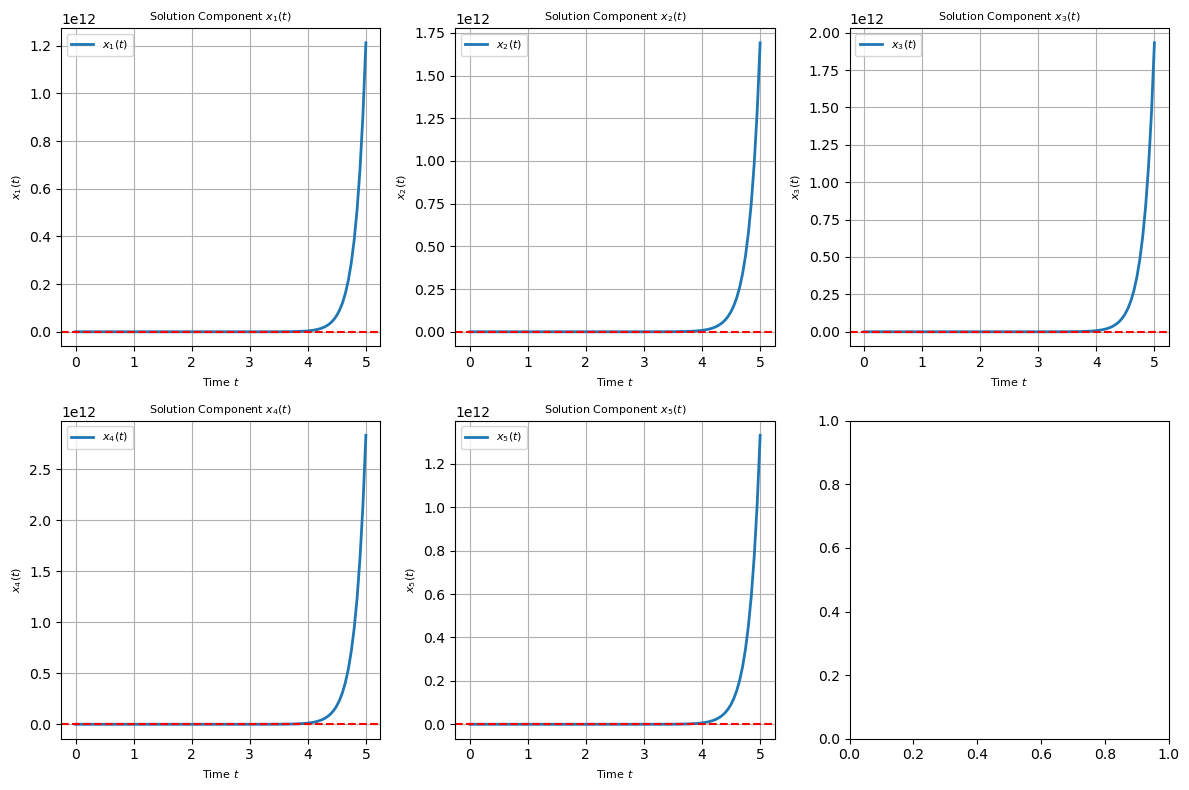

In [43]:
# 创建 2x3 的子图
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# 展平 axes 数组，便于索引
axes = axes.ravel()

# 循环绘制每个分量
for i in range(x_t_all.shape[1]):
    axes[i].plot(t_values, x_t_all[:, i], label=f'$x_{i+1}(t)$', linewidth=2)
    axes[i].set_title(f'Solution Component $x_{i+1}(t)$', fontsize=8)
    axes[i].axhline(0, color='r', linestyle='--')
    axes[i].set_xlabel('Time $t$', fontsize=8)
    axes[i].set_ylabel(f'$x_{i+1}(t)$', fontsize=8)
    axes[i].legend(fontsize=8)
    axes[i].grid()

# 调整子图布局
plt.tight_layout()
plt.show()


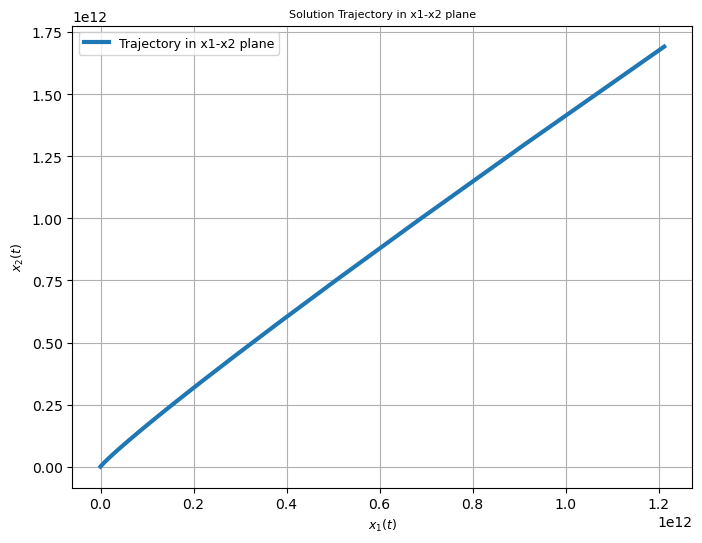

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(x_t_all[:, 0], x_t_all[:, 1], label='Trajectory in x1-x2 plane', linewidth=3)
plt.title('Solution Trajectory in x1-x2 plane', fontsize=8)
plt.xlabel('$x_1(t)$', fontsize=9)
plt.ylabel('$x_2(t)$', fontsize=9)
plt.legend(fontsize=9)
plt.grid()
plt.show()